Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Loading the Files

In [4]:
trainingSet = pd.read_csv('data/train.csv')
train_set = trainingSet[trainingSet['Score'].notna()]
test_set = trainingSet[trainingSet['Score'].isna()]

# Handling Data + Focus on Text Sentiment

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text_train = tfidf_vectorizer.fit_transform(train_set['Text'].fillna(""))

def get_textblob_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return {'polarity': sentiment.polarity, 'subjectivity': sentiment.subjectivity}

sentiment_train = train_set['Text'].fillna("").apply(lambda text: get_textblob_sentiment(str(text)))
sentiment_df_train = pd.DataFrame(list(sentiment_train))

sentiment_test = test_set['Text'].fillna("").apply(lambda text: get_textblob_sentiment(str(text)))
sentiment_df_test = pd.DataFrame(list(sentiment_test))

# Features + Model Running

In [6]:
X_combined_train = hstack((X_text_train, sentiment_df_train[['polarity', 'subjectivity']].values))

Y_train = train_set['Score']
X_train, X_val, Y_train, Y_val = train_test_split(X_combined_train, Y_train, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, n_jobs=-1)
model.fit(X_train, Y_train)

Y_val_pred = model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(Y_val, Y_val_pred):.2f}')
print(classification_report(Y_val, Y_val_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.64
              precision    recall  f1-score   support

         1.0       0.59      0.56      0.58     18074
         2.0       0.41      0.25      0.31     17604
         3.0       0.45      0.35      0.39     35179
         4.0       0.48      0.32      0.39     67127
         5.0       0.73      0.90      0.80    159085

    accuracy                           0.64    297069
   macro avg       0.53      0.48      0.49    297069
weighted avg       0.61      0.64      0.62    297069



# Split Data

In [22]:
# Split training set into training and testing set
X_train, X_val, Y_train, Y_val = train_test_split(X_combined_train, Y_train, test_size=0.2, random_state=42)


# Create submission file

In [24]:
submission = test_set[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

# Confusion Matrix

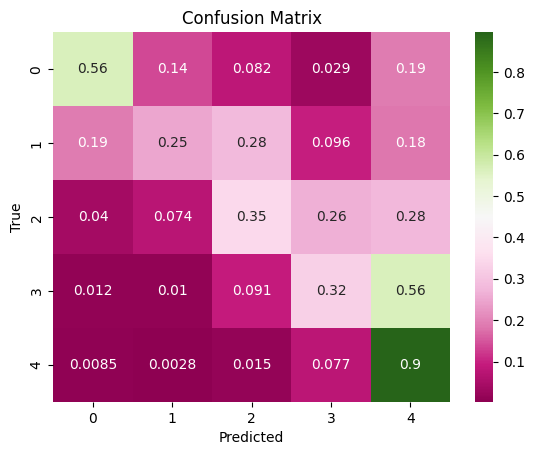

In [25]:
cm = confusion_matrix(Y_val, Y_val_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='PiYG')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()